In [2]:
# from lab3
import os
cpu = input('enter CPU number (0/1)?')
str = "taskset -c "+cpu+" python3 fib.py"
print(str)
os.system(str)

enter CPU number (0/1)?1
taskset -c 1 python3 fib.py
time spent: 4.410743713378906e-05


0

In [11]:
# use psutil
import psutil, time

# Create a function to get the CPU usage
def get_cpu_usage():
  """Returns the CPU usage as a percentage."""
  return psutil.cpu_percent()

# Create a loop to continuously monitor the CPU usage
while True:
  # Get the CPU usage
  cpu_usage = get_cpu_usage()

  # Print the CPU usage to the console
  print(f"CPU usage: {cpu_usage}%")

  # Sleep for 1 second
  time.sleep(1)

CPU usage: 1.1%
CPU usage: 5.5%
CPU usage: 2.0%


KeyboardInterrupt: 

In [ ]:
#Implement ELAPSED TIME
import time
start = time.time()
#<<<< tratar fibonacci con argumento de entrada que tome valores 1-30
time.sleep(1)
end = time.time()
print(end - start)

In [9]:
#new /clock_example0/cycletime2.c version2
# /home/xilinx/jupyter_notebooks/RLS/Assignm3_PMU/clock_example0#
# https://docs.python.org/3/library/ctypes.html

%reset -f
import ctypes, time
_libInC = ctypes.CDLL('./clock_example0/libMyLib.so')
val = _libInC.version();print("Library version: "+ str(val))

for n in range(5):
    _libInC.init_cntrs(1,0)
    #time.sleep(1)
    val = ctypes.c_uint(_libInC.gcyclec()).value;print(val)    

Library version: 671
55033
6486
5873
5771
6026


In [ ]:
#new /clock_example0/cycletime2.c version2
# /home/xilinx/jupyter_notebooks/RLS/Assignm3_PMU/clock_example0#
# https://docs.python.org/3/library/ctypes.html

%reset -f
import ctypes, time
_libInC = ctypes.CDLL('./clock_example0/libMyLib.so')
val = _libInC.version();print("Library version: "+ str(val))

for n in range(5):
    _libInC.init_cntrs(1,0)
    #time.sleep(1)
    val = ctypes.c_uint(_libInC.gcyclec()).value;print(val)    


Library version: 671
taskset -c 1 python3 fib.py 0
Please enter a positive integer
time spent: 3.9577484130859375e-05
taskset -c 1 python3 fib.py 0-> NumberOfTerms: 0 -> Elapsed time = 0.2825541, cycles = 30899800.25
taskset -c 1 python3 fib.py 5
time spent: 4.57763671875e-05
taskset -c 1 python3 fib.py 5-> NumberOfTerms: 5 -> Elapsed time = 0.283452, cycles = 26860213.75
taskset -c 1 python3 fib.py 10
time spent: 0.00033855438232421875
taskset -c 1 python3 fib.py 10-> NumberOfTerms: 10 -> Elapsed time = 0.2810333, cycles = 24839358.75
taskset -c 1 python3 fib.py 15
time spent: 0.003538370132446289
taskset -c 1 python3 fib.py 15-> NumberOfTerms: 15 -> Elapsed time = 0.284327, cycles = 25086398.5
taskset -c 1 python3 fib.py 20
time spent: 0.03590726852416992
taskset -c 1 python3 fib.py 20-> NumberOfTerms: 20 -> Elapsed time = 0.3175039, cycles = 25147380.5
taskset -c 1 python3 fib.py 25
time spent: 0.39580512046813965
taskset -c 1 python3 fib.py 25-> NumberOfTerms: 25 -> Elapsed time = 

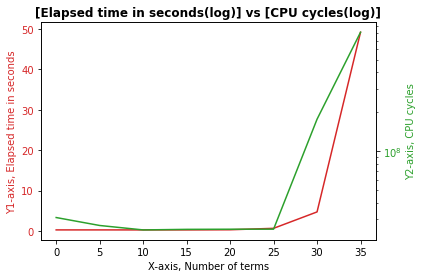

In [8]:
# Part A3.2: Comparing and Gathering Data, (running fibonacci sequence) 
%reset -f
CPU, TERMSary, ELAPSEDary, CYCLESary = "1", [], [], []

import os, ctypes, time, math;import matplotlib.pyplot as plt 

def Average(lst): 
    return sum(lst) / len(lst) 

_libInC = ctypes.CDLL('./clock_example0/libMyLib.so')
val = _libInC.version();print("Library version: "+ str(val))
for NumberOfTerms in range(0,40,5):
    cmd = "taskset -c "+CPU+" python3 fib.py "+ str(NumberOfTerms);print (cmd)
    start = time.time()
    _libInC.init_cntrs(1,0)
    os.system(cmd)
    lst = []
    for n in range(4):
        cycles = ctypes.c_uint(_libInC.gcyclec()).value        
        lst.append(cycles)
    ave = Average(lst) 
    end = time.time();elapsed = end - start;elapsed = round(elapsed, 7)
    print(cmd+"-> NumberOfTerms: "+ str(NumberOfTerms)+ " -> Elapsed time = " +str(elapsed)\
          +", cycles = "+str(ave))
    TERMSary.append(NumberOfTerms);ELAPSEDary.append(elapsed);CYCLESary.append(ave)  
    lst = []

x = TERMSary
dataset_1 = ELAPSEDary
dataset_2 = CYCLESary
fig, ax1 = plt.subplots() 
 
color = 'tab:red'
ax1.set_xlabel('X-axis, Number of terms') 
ax1.set_ylabel('Y1-axis, Elapsed time in seconds', color = color) 
ax1.plot(x, dataset_1, color = color) 
ax1.tick_params(axis ='y', labelcolor = color) 
ax2 = ax1.twinx() # Adding Twin Axes to plot using dataset_2
color = 'tab:green'
ax2.set_ylabel('Y2-axis, CPU cycles', color = color) 
ax2.plot(x, dataset_2, color = color) 
ax2.tick_params(axis ='y', labelcolor = color) 
plt.title('[Elapsed time in seconds(log)] vs [CPU cycles(log)]', fontweight ="bold") 
plt.yscale("log")
plt.show()

In [21]:
#Cycles To Seconds Formula
f = 3e9#650000000
cycles = 100

secs=(1/( *f))*cycles

print(secs)


3.333333333333333e-10


In [27]:
f = 650 000 000
JustOneCycle = 1/f #secons
print(JustOneCycle)
print("----------")
cycles = 3000000000
TimeElapsedInSeconds = cycles * JustOneCycle
print(TimeElapsedInSeconds)

3.333333333333333e-10
----------
1.0


Library version: 671
taskset -c 1 python3 fib.py 0
Please enter a positive integer
time spent: 4.029273986816406e-05
taskset -c 1 python3 fib.py 0-> NumberOfTerms: 0:
Elapsed time = 0.288913488, Elapsed Seconds by get cycles = 1.6421061538461539
taskset -c 1 python3 fib.py 5
time spent: 4.410743713378906e-05
taskset -c 1 python3 fib.py 5-> NumberOfTerms: 5:
Elapsed time = 0.281714201, Elapsed Seconds by get cycles = 0.6000323076923078
taskset -c 1 python3 fib.py 10
time spent: 0.000339508056640625
taskset -c 1 python3 fib.py 10-> NumberOfTerms: 10:
Elapsed time = 0.281897068, Elapsed Seconds by get cycles = 0.6565969230769231
taskset -c 1 python3 fib.py 15
time spent: 0.0034394264221191406
taskset -c 1 python3 fib.py 15-> NumberOfTerms: 15:
Elapsed time = 0.285347223, Elapsed Seconds by get cycles = 0.63026
taskset -c 1 python3 fib.py 20
time spent: 0.03600001335144043
taskset -c 1 python3 fib.py 20-> NumberOfTerms: 20:
Elapsed time = 0.317011595, Elapsed Seconds by get cycles = 0.6317

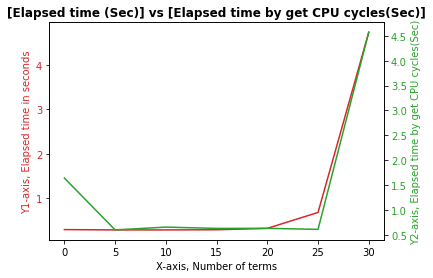

In [24]:
# Part A3.2: Comparing and Gathering Data, ERROR BAR (running fibonacci sequence) 
%reset -f
CPU, TERMSary, ELAPSEDary, ELAPSEDCYCLESary = "1", [], [], []

import os, ctypes, time, math;import matplotlib.pyplot as plt 
f = 650000
JustOneCycle = 1/f #secons

def Average(lst): 
    return sum(lst) / len(lst) 

_libInC = ctypes.CDLL('./clock_example0/libMyLib.so')
val = _libInC.version();print("Library version: "+ str(val))
_libInC.init_cntrs(1,1)
for NumberOfTerms in range(0,35,5):
    cmd = "taskset -c "+CPU+" python3 fib.py "+ str(NumberOfTerms);print (cmd)
    start = time.time()
    #_libInC.init_cntrs(1,1)
    StartCycles = ctypes.c_uint(_libInC.gcyclec()).value 
    os.system(cmd)
    lst = []
    #for n in range(4):
    #    cycles = ctypes.c_uint(_libInC.gcyclec()).value        
    #    lst.append(cycles)
    #ave = Average(lst)
    StopCycles = ctypes.c_uint(_libInC.gcyclec()).value 
    ElapsedTimeCycles = StopCycles - StartCycles
    TimeElapsedInSeconds = ElapsedTimeCycles * JustOneCycle
    #TimeElapsedInSeconds = round(TimeElapsedInSeconds, 9)
    end = time.time();elapsed = end - start;elapsed = round(elapsed, 9)
    print(cmd+"-> NumberOfTerms: "+ str(NumberOfTerms)+ ":\nElapsed time = " +str(elapsed)\
          +", Elapsed Seconds by get cycles = "+str(TimeElapsedInSeconds))
    TERMSary.append(NumberOfTerms);ELAPSEDary.append(elapsed);ELAPSEDCYCLESary.append(TimeElapsedInSeconds)  
    lst = []

x = TERMSary
dataset_1 = ELAPSEDary
dataset_2 = ELAPSEDCYCLESary
fig, ax1 = plt.subplots() 
 
color = 'tab:red'
ax1.set_xlabel('X-axis, Number of terms') 
ax1.set_ylabel('Y1-axis, Elapsed time in seconds', color = color) 
ax1.plot(x, dataset_1, color = color) 
ax1.tick_params(axis ='y', labelcolor = color) 
ax2 = ax1.twinx() # Adding Twin Axes to plot using dataset_2
color = 'tab:green'
ax2.set_ylabel('Y2-axis, Elapsed time by get CPU cycles(Sec)', color = color) 
ax2.plot(x, dataset_2, color = color) 
ax2.tick_params(axis ='y', labelcolor = color) 
plt.title('[Elapsed time (Sec)] vs [Elapsed time by get CPU cycles(Sec)]', fontweight ="bold") 
#plt.yscale("log")
plt.show()